### **Bike Sharing Demand Analysis - Capital Bike Share**

*Data Source :*
* *[Original Source](http://capitalbikeshare.com/system-data)*
* *[Weather Information](http://www.freemeteo.com)*

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation
<br><br>
---

#### **Business Problem Understanding**

**Context**<br>

Urban mobility is evolving rapidly, and bike-sharing systems have become a critical part of the transportation ecosystem in many cities. Bike-sharing services offer an eco-friendly and cost-effective means of commuting, suitable for short trips, daily commutes, and leisurely rides. The convenience of these services depends largely on ensuring that bikes are readily available when and where they are needed.

Managing bike availability is a complex task, influenced by fluctuating factors such as time of day, weather, season, and user behavior. Without an effective predictive system, operators face challenges like bike shortages during peak hours or an excess of bikes during off-peak times, both of which can result in dissatisfied users and increased operational costs.

To overcome these challenges, there is a need for a data-driven solution that helps bike-sharing services optimize bike allocation.

**Problem Statement**

The primary challenge for bike-sharing operators is to determine demand for bikes throughout different times of the day. Accurately forecasting demand helps ensure that bikes are available when needed most, which is critical to reducing unmet customer demand and avoiding operational inefficiencies.

Operators face significant issues without understanding peak and off-peak demand. A lack of bikes during high-demand times frustrates customers, while excess bikes during low-demand periods result in increased storage and maintenance costs. To address these challenges, **bike-sharing services must effectively predict daily and hourly bike demand to optimize resource allocation, minimize costs, and enhance customer satisfaction.**

**Goals**

The goal is to **provide a predictive solution that can accurately forecast the hourly and daily demand for bike rentals**. By leveraging factors such as weather conditions, holidays, seasonal trends, and time-based patterns, operators can make informed decisions to improve bike distribution, reduce operational costs, and enhance customer satisfaction.

This solution aims to be more than just a tool for operators. It also provides value to city planners, researchers, and policymakers by helping them understand and plan for bike-sharing needs, ultimately contributing to a more sustainable urban environment. This data-driven approach ensures efficient service, supports operational excellence, and enables informed decision-making by all stakeholders interested in understanding bike demand dynamics.

**Analytic Approach**

The approach begins with an analysis of historical bike rental data to identify key features influencing demand. This includes exploratory data analysis (EDA) to understand trends, seasonality, and correlations among factors like weather, time of day, and holidays.

Machine learning models such as Linear Regression, Multiple Linear Regression, Ridge Regression and Lasso Regression will be used to predict demand. 

The development of the app is implemented using Streamlit, providing an interactive and user-friendly interface that allows stakeholders to explore predictions and make data-driven decisions.

**Metric Evaluation**

The performance of the predictive models will be assessed using **RMSE (Root Mean Squared Error), R-squared, MAPE (Mean Absolute Percentage Error), and MSE (Mean Squared Error).** RMSE measures the average magnitude of prediction errors and is useful for understanding how close predictions are to actual values, with lower values indicating better accuracy. MSE, a related metric, calculates the average of squared errors, penalizing larger errors more heavily, making it a valuable measure of overall model fit.

R-squared evaluates how well the independent variables explain the variance in the target variable, with values closer to 1 indicating stronger explanatory power. MAPE, on the other hand, provides a percentage-based error measure, helping to interpret the prediction accuracy relative to the scale of the data. By using these metrics together, we gain a comprehensive understanding of the model’s performance in terms of error magnitude, variance explanation, and prediction reliability.

#### **Data Understanding**

**Import Libraries (for Exploratory Data Analysis)**

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

**Load Dataset**

In [5]:
df = pd.read_csv("/Users/vinavalentia/Documents/SEMESTER 7/BOOTCAMP/Module 3/CAPSTONE/data_bike_sharing.csv")
df.tail()

dteday   hum  weathersit  holiday  season   atemp  temp  hr  \
12160  2012-01-25  0.75           1        0       1  0.2273  0.24   7   
12161  2012-07-06  0.62           1        0       3  0.7424  0.78   0   
12162  2012-02-20  0.60           2        1       1  0.2121  0.24   5   
12163  2012-03-31  0.77           2        0       2  0.4242  0.42   2   
12164  2011-04-28  0.47           1        0       2  0.6212  0.64  18   

       casual  registered  cnt  
12160      14         243  257  
12161      39          63  102  
12162       0           6    6  
12163      14          55   69  
12164      44         486  530

* The dataset above is taken from the Capital Bike Share from Metro DC between 2011 and 2012.
* Each row represents information about a particular day of bike-sharing activity, including weather conditions, holidays, the number of casual and registered users, and total rides.
<br><br>

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
|---------------|---------------|-----------------|
| dteday | Object | Date |
| hum | Float | Normalized humidity. The values are divided into 100 (max) |
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | Holiday or not |
| season | Integer | Season (1: winter, 2: spring, 3: summer, 4: fall) |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| temp | Float | Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Count of casual users |
| registered | Integer | Count of registered users |
| cnt | Integer | Count of total rental bikes including both casual and registered |

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Interpretation :
* Dataset memiliki 12.165 baris dan 11 kolom, semuanya tidak memiliki nilai kosong (non-null).

In [7]:
display(df.describe(), df.describe(include = object))

hum    weathersit       holiday        season         atemp  \
count  12165.000000  12165.000000  12165.000000  12165.000000  12165.000000   
mean       0.625451      1.416934      0.029758      2.488615      0.476996   
std        0.192102      0.635937      0.169925      1.106157      0.171857   
min        0.000000      1.000000      0.000000      1.000000      0.000000   
25%        0.470000      1.000000      0.000000      2.000000      0.333300   
50%        0.620000      1.000000      0.000000      2.000000      0.484800   
75%        0.780000      2.000000      0.000000      3.000000      0.621200   
max        1.000000      4.000000      1.000000      4.000000      1.000000   

               temp            hr        casual    registered           cnt  
count  12165.000000  12165.000000  12165.000000  12165.000000  12165.000000  
mean       0.498185     11.519770     35.834443    153.436580    189.271023  
std        0.192492      6.931872     49.489286    151.046123    181.223903  
min        0.020000      0.000000      0.000000      0.000000      1.000000  
25%        0.340000      6.000000      4.000000     34.000000     40.000000  
50%        0.500000     12.000000     17.000000    115.000000    142.000000  
75%        0.660000     18.000000     49.000000    220.000000    282.000000  
max        1.000000     23.000000    362.000000    876.000000    970.000000

dteday
count        12165
unique         731
top     2011-08-09
freq            22

Interpretasi :
* Kolom numerik menunjukkan distribusi nilai seperti rata-rata (mean), standar deviasi (std), dan kuartil (Q1, Q2(median), Q3).
* Variabel cnt (jumlah peminjaman sepeda) memiliki rata-rata sekitar 189.27 dengan maksimum mencapai 977.
* Tidak ada nilai ekstrem untuk beberapa variabel seperti holiday dan season karena tipe datanya diskret.

In [8]:
# data unique di tiap kolom
pd.set_option('display.max_colwidth', 100)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0       dteday               731   
1          hum                89   
2   weathersit                 4   
3      holiday                 2   
4       season                 4   
5        atemp                65   
6         temp                50   
7           hr                24   
8       casual               305   
9   registered               742   
10         cnt               830   

                                                                                          Unique Sample  
0   [2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01,...  
1   [0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0....  
2                                                                                          [1, 2, 3, 4]  
3                                                                                                [0, 1]  
4                                                                                          [4, 2, 3, 1]  
5   [0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394, 0.2576, 0.5455, 0.2273, ...  
6   [0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66, 0.44, 0.58, 0.28, 0.22, 0.4, 0.38, 0.68, 0...  
7                [16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21, 20, 11, 3, 13, 19, 6, 12, 1, 2, 10, 17]  
8   [24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, 0, 110, 51, 7, 10, 45, 30, 87, 5, 15, 60, 49, 122,...  
9   [226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 20, 278, 273, 127, 74, 48, 192, 110, 223, 652, 432,...  
10  [250, 18, 107, 145, 857, 45, 216, 40, 7, 534, 21, 280, 279, 138, 83, 65, 16, 302, 161, 230, 662,...

Interpretasi :
* Kolom dteday memiliki 731 nilai unik, mengindikasikan data ini mencakup 2 tahun.
* Kolom seperti season dan weathersit memiliki jumlah nilai unik kecil (kategori diskret).
* Variabel casual dan registered menunjukkan adanya distribusi berbeda dalam jumlah penyewaan berdasarkan tipe pengguna.

#### **Exploratory Data Analysis**

In [9]:
profile = ProfileReport(df, title = "Profiling Bike Sharing Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

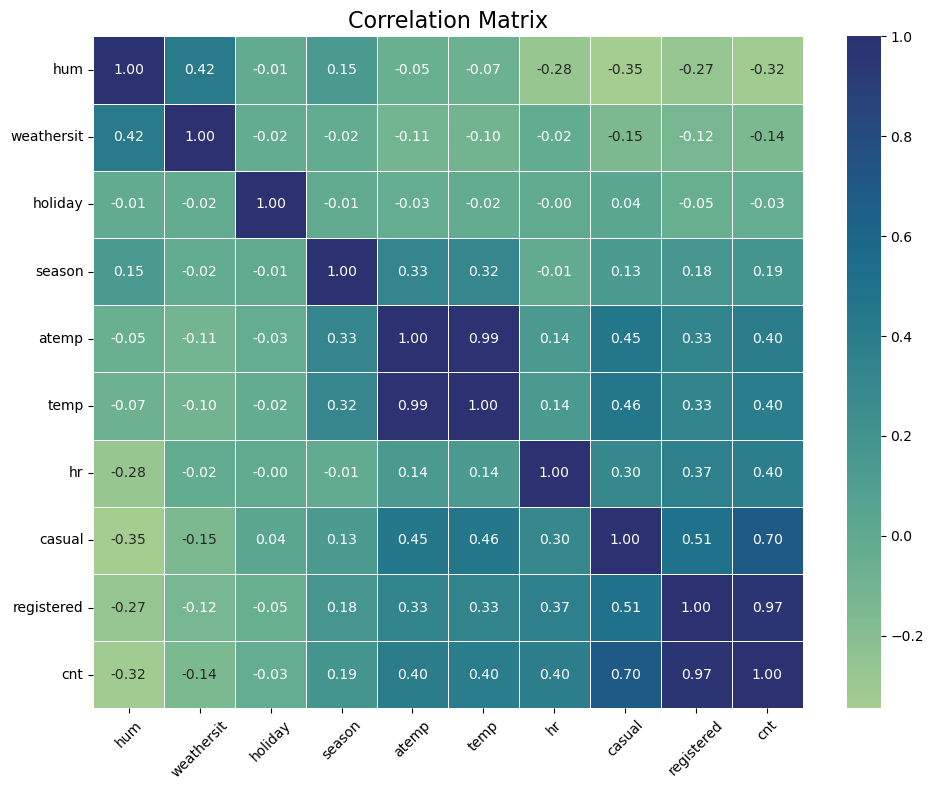

In [10]:
df_num = df[["hum", "weathersit", "holiday", "season", "atemp", "temp", "hr", "casual", "registered", "cnt"]]
corr_matrix = df_num.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap="crest", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Interpretasi :

cnt (jumlah penyewaan) berkorelasi tinggi dengan:
* registered (0.97): Artinya penyewaan lebih banyak berasal dari pengguna terdaftar.
* casual (0.7): Pengguna kasual juga memberikan kontribusi yang cukup besar.
* temp dan atemp (suhu = ~0.4) memengaruhi jumlah penyewaan.
* holiday dan weathersit memiliki korelasi rendah terhadap cnt, menunjukkan bahwa kondisi cuaca dan liburan tidak secara signifikan memengaruhi penyewaan sepeda.

#### **Data Cleaning**

In [11]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
df.duplicated().sum()

0

Interpretasi :
* Dataset tidak memiliki nilai kosong (NaN) maupun data duplikat.

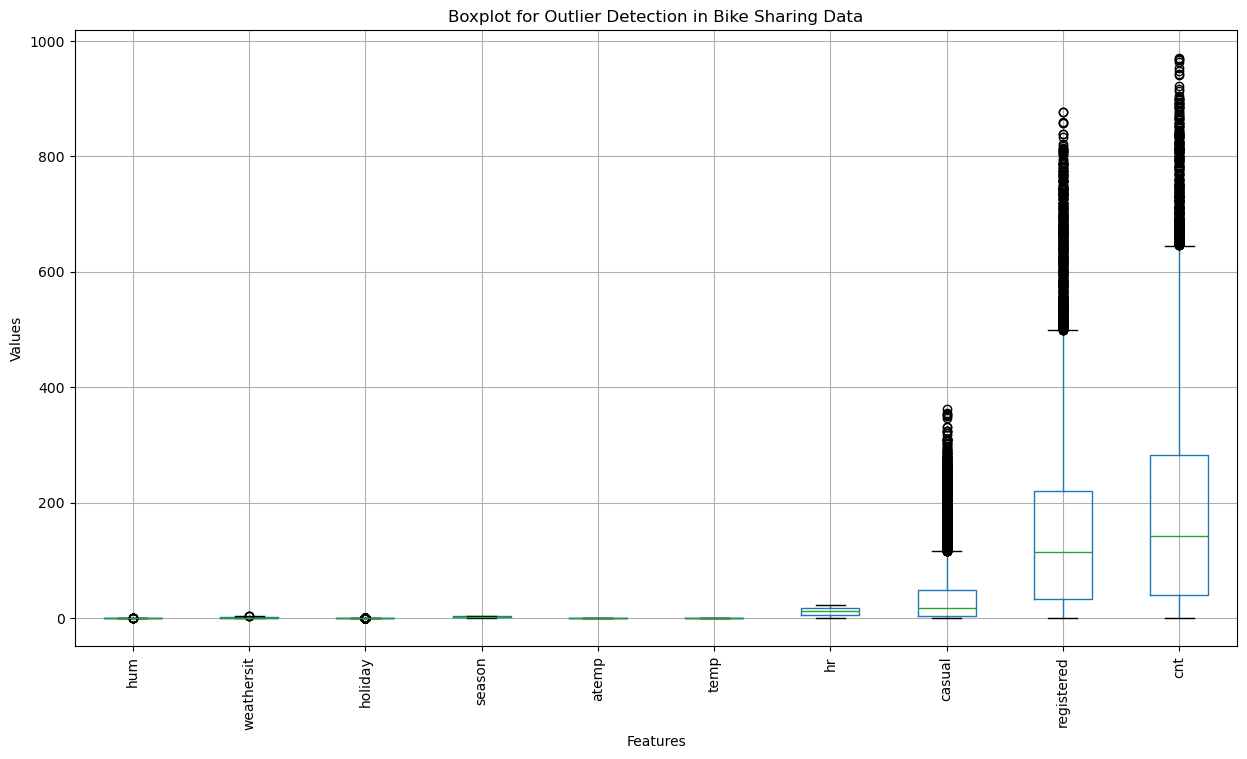

In [13]:
plt.figure(figsize=(15, 8))

df_num.boxplot(rot=90)

plt.title("Boxplot for Outlier Detection in Bike Sharing Data")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [14]:
for column in df_num.columns:
    # Hitung Q1 dan Q3
    Q1 = df_num[column].quantile(0.25)
    Q3 = df_num[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Hitung batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df_num[(df_num[column] < lower_bound) | (df_num[column] > upper_bound)]
    
    print(f"Outliers in variable {column}: {outliers.shape[0]} outliers")

Outliers in variable hum: 14 outliers
Outliers in variable weathersit: 3 outliers
Outliers in variable holiday: 362 outliers
Outliers in variable season: 0 outliers
Outliers in variable atemp: 0 outliers
Outliers in variable temp: 0 outliers
Outliers in variable hr: 0 outliers
Outliers in variable casual: 847 outliers
Outliers in variable registered: 470 outliers
Outliers in variable cnt: 338 outliers


*Outlier pada dataset merepresentasikan kondisi ekstrem yang penting untuk dipertimbangkan dalam analisis, terutama karena dapat memberikan insight mendalam terkait pola permintaan penyewaan sepeda. Oleh karena itu, outlier tidak dibuang.*

#### **Feature Engineering**

In [15]:
df.head()

dteday   hum  weathersit  holiday  season   atemp  temp  hr  casual  \
0  2011-12-09  0.62           1        0       4  0.3485  0.36  16      24   
1  2012-06-17  0.64           1        0       2  0.5152  0.54   4       2   
2  2011-06-15  0.53           1        0       2  0.6212  0.62  23      17   
3  2012-03-31  0.87           2        0       2  0.3485  0.36   8      19   
4  2012-07-31  0.55           1        0       3  0.6970  0.76  18      99   

   registered  cnt  
0         226  250  
1          16   18  
2          90  107  
3         126  145  
4         758  857

*Mengubah format dteday dan membaginya menjadi 3 kolom Year, Month, dan Day untuk mempermudah analisis berbasis waktu, seperti membandingkan data antar tahun, bulan, atau hari. <br> Kemudian menghapus kolom dteday untuk menghindari redundansi*

In [16]:
df["dteday"] = pd.to_datetime(df["dteday"], format="%Y-%m-%d")
df["Year"] = df["dteday"].dt.year
df["Month"] = df["dteday"].dt.month
df["Day"] = df["dteday"].dt.day

df.head()

dteday   hum  weathersit  holiday  season   atemp  temp  hr  casual  \
0 2011-12-09  0.62           1        0       4  0.3485  0.36  16      24   
1 2012-06-17  0.64           1        0       2  0.5152  0.54   4       2   
2 2011-06-15  0.53           1        0       2  0.6212  0.62  23      17   
3 2012-03-31  0.87           2        0       2  0.3485  0.36   8      19   
4 2012-07-31  0.55           1        0       3  0.6970  0.76  18      99   

   registered  cnt  Year  Month  Day  
0         226  250  2011     12    9  
1          16   18  2012      6   17  
2          90  107  2011      6   15  
3         126  145  2012      3   31  
4         758  857  2012      7   31

In [17]:
df = df[["dteday", "Year", "Month", "Day", "hum", "weathersit", "holiday", "season", "atemp", "temp", "hr", "casual", "registered", "cnt"]]
df = df.drop("dteday", axis = 1)
df.head()

Year  Month  Day   hum  weathersit  holiday  season   atemp  temp  hr  \
0  2011     12    9  0.62           1        0       4  0.3485  0.36  16   
1  2012      6   17  0.64           1        0       2  0.5152  0.54   4   
2  2011      6   15  0.53           1        0       2  0.6212  0.62  23   
3  2012      3   31  0.87           2        0       2  0.3485  0.36   8   
4  2012      7   31  0.55           1        0       3  0.6970  0.76  18   

   casual  registered  cnt  
0      24         226  250  
1       2          16   18  
2      17          90  107  
3      19         126  145  
4      99         758  857

*Mengubah nama kolom lebih deskriptif dan mudah dimengerti oleh pembaca dataset.*

In [18]:
df = df.rename({"hum": "Humidity",
                "weathersit": "Weather",
                "season": "Season",
                "temp": "Temperature",
                "hr": "Hour",
                "cnt": "Count",
                "dayname": "Day Name",
                "holiday": "Holiday"}, axis=1)

df.head()

Year  Month  Day  Humidity  Weather  Holiday  Season   atemp  Temperature  \
0  2011     12    9      0.62        1        0       4  0.3485         0.36   
1  2012      6   17      0.64        1        0       2  0.5152         0.54   
2  2011      6   15      0.53        1        0       2  0.6212         0.62   
3  2012      3   31      0.87        2        0       2  0.3485         0.36   
4  2012      7   31      0.55        1        0       3  0.6970         0.76   

   Hour  casual  registered  Count  
0    16      24         226    250  
1     4       2          16     18  
2    23      17          90    107  
3     8      19         126    145  
4    18      99         758    857

*Melakukan pengelompokan nilai (Binning) kelembapan (Humidity) ke dalam kategori seperti "Low", "Medium", dan "High". <br>Hal tersebut dilakukan untuk mempermudah analisis kategoris dibandingkan analisis numerik dan untuk menghindari outlier.*

In [19]:
bins_hum = [0, 0.4, 0.7, 1.0]
labels_hum = ["Low", "Medium", "High"]
df["Humidity_Binned"] = pd.cut(df["Humidity"], bins = bins_hum, labels = labels_hum, include_lowest = True)

In [20]:
df.head()

Year  Month  Day  Humidity  Weather  Holiday  Season   atemp  Temperature  \
0  2011     12    9      0.62        1        0       4  0.3485         0.36   
1  2012      6   17      0.64        1        0       2  0.5152         0.54   
2  2011      6   15      0.53        1        0       2  0.6212         0.62   
3  2012      3   31      0.87        2        0       2  0.3485         0.36   
4  2012      7   31      0.55        1        0       3  0.6970         0.76   

   Hour  casual  registered  Count Humidity_Binned  
0    16      24         226    250          Medium  
1     4       2          16     18          Medium  
2    23      17          90    107          Medium  
3     8      19         126    145            High  
4    18      99         758    857          Medium

In [21]:
df.isna().sum()

Year               0
Month              0
Day                0
Humidity           0
Weather            0
Holiday            0
Season             0
atemp              0
Temperature        0
Hour               0
casual             0
registered         0
Count              0
Humidity_Binned    0
dtype: int64

#### **Modelling**

**Import Libraries (for Modelling)**

In [22]:
# Import model selection and evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.feature_selection import RFE

# Import category encoding tools and transformers
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Import transformers
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
import statsmodels.api as sm

# Import metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Multicollinearity**

In [23]:
X_vif = df.drop(["Humidity_Binned", "Humidity", "casual", "registered", "Count"], axis = 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Menghitung VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Tampilkan hasil VIF
vif_data

Feature        VIF
0         Year   1.001849
1        Month   3.213937
2          Day   1.003315
3      Weather   1.013120
4      Holiday   1.004764
5       Season   3.437437
6        atemp  40.067091
7  Temperature  39.902672
8         Hour   1.025303

Interpretasi :
* Fitur Temperature dan atemp memiliki nilai VIF yang sangat tinggi (di atas 10), menunjukkan multikolinearitas yang kuat.
* Hal tersebut mengindikasikan bahwa salah satu fitur redundant dan perlu dihapus untuk mengurangi efek multikolinearitas.

**Encoding**

In [24]:
transformer = ColumnTransformer([
    ("One Hot", OneHotEncoder(drop = "first", handle_unknown = "ignore"), ["Humidity_Binned"])
], remainder = "passthrough")

*Mengonversi fitur kategorikal (Humidity_Binned) ke dalam representasi numerik menggunakan one-hot encoding.*

**Scaling**

*Melakukan standardisasi fitur numerik menggunakan Standard Scaler sehingga memiliki skala yang sama, dengan rata-rata 0 dan standar deviasi 1. <br>StandardScaler dipilih karena dataset ini relatif simetris dan tidak memiliki banyak outlier, sehingga metode ini menghasilkan distribusi yang paling sesuai untuk algoritma berbasis gradien, analisis VIF, dan interpretasi koefisien model regresi.*

In [25]:
scaler = StandardScaler()

**Data Split**

*Membagi dataset menjadi data train (70%) dan data test (30%) agar model dapat dievaluasi secara objektif.*

In [26]:
X = df.drop(["Humidity", "casual", "registered", "Count"], axis = 1)
y = df["Count"]

In [27]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size = 0.2,
    random_state = 69)

**Choose A Benchmark Model**

*Membandingkan berbagai model regresi untuk memprediksi target (Count), dan memilih model terbaik berdasarkan kinerja.* <br><br>
Model yang Digunakan:
* Linear Regression
* Ridge & Lasso Regression
* K-Nearest Neighbors (KNN)
* Decision Tree Regressor
* Random Forest
* Gradient Boosting 
* XGBoost

In [28]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso(random_state = 69)
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state = 69)
rf = RandomForestRegressor(random_state = 69)
gb = GradientBoostingRegressor(random_state = 69)
xgb = XGBRegressor(random_state = 69)

*Menggunakan TransformedTargetRegressor untuk mengubah target menjadi logaritmik. <br>Hal tersebut dilakukan karena distribusi target tidak normal.*

In [29]:
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [30]:
models = [log_lr, log_ridge, log_lasso, log_knn, log_dt, log_rf, log_gb, log_xgb]

score_rmse = []                  
nilai_mean_rmse = []    
nilai_std_rmse = []  

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

In [31]:
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ("preprocessing", transformer),
        ("scaler", scaler),
        ("model", i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

     # R-square
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-163.93535019 -171.97257931 -165.61084937 -162.63777629 -167.18302067] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-108.65196855 -115.91185635 -111.06989573 -108.33370896 -110.06712143] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.44082384 -1.4253913  -1.42963475 -1.39872152 -1.49119746] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.12866686 0.17396346 0.11395414 0.16626974 0.1757727 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-163.92716902 -171.96446215 -165.6031367  -162.63345478 -167.17281205] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge())
[-108.64831037 -

**Model Evaluation**

In [32]:
model_summary = pd.DataFrame({
    'Model': ["Linear Regression", "Ridge Regression", 
              "Lasso Regressior", "K Neighbor Regressor", 
              "Desicion Tree Rergessor", "Random Forest Regressor", 
              "Gradient Boosting Regressor", "XGBoost Regressor"],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2
})

In [33]:
model_summary

Model   Mean_RMSE  Std_RMSE    Mean_MAE   Std_MAE  \
0            Linear Regression -166.267915  3.238244 -110.806910  2.736327   
1             Ridge Regression -166.260207  3.237268 -110.802804  2.735701   
2             Lasso Regressior -204.458942  6.985422 -142.694188  4.806664   
3         K Neighbor Regressor -119.423881  3.631890  -75.997625  2.324816   
4      Desicion Tree Rergessor -112.584674  3.523288  -67.607616  2.497925   
5      Random Forest Regressor  -86.355077  2.951485  -54.946157  1.962427   
6  Gradient Boosting Regressor  -92.668081  2.506185  -60.380964  1.865844   
7            XGBoost Regressor  -86.889677  3.490035  -55.578063  2.420112   

   Mean_MAPE  Std_MAPE   Mean_R2    Std_R2  
0  -1.437154  0.030352  0.151725  0.025466  
1  -1.437208  0.030355  0.151804  0.025464  
2  -3.744531  0.090835 -0.281442  0.027353  
3  -0.927438  0.078606  0.562299  0.020843  
4  -0.856885  0.050987  0.611407  0.006682  
5  -0.576834  0.022275  0.771343  0.007116  
6  -0.578052  0.014334  0.736584  0.008272  
7  -0.544177  0.019584  0.768555  0.008838

Interpretasi : <br><br>
Model dengan Performa Terbaik :<br><br>
Random Forest Regressor
* Mean_RMSE (-86.36): Terendah di antara semua model, menunjukkan kesalahan prediksi rata-rata terkecil.
* Mean_MAE (-54.95): Terendah, menunjukkan kesalahan absolut terkecil.
* Mean_MAPE (-0.577): Terbaik, menunjukkan persentase kesalahan terkecil.
* Mean_R² (0.7713): Tertinggi, menunjukkan model dapat menjelaskan 77.13% variabilitas dalam data.
<br>

XGBoost Regressor
* Performa model hampir setara dengan Random Forest, tetapi stabilitasnya sedikit lebih rendah.

Penjelasan Model :

**XGBoost Regressor dan Random Forest Regressor** adalah dua algoritma regresi berbasis ensemble learning yang populer. **XGBoost (Extreme Gradient Boosting)** bekerja menggunakan pendekatan boosting, di mana model dibangun secara bertahap, dengan setiap model baru memperbaiki kesalahan dari model sebelumnya. Prosesnya melibatkan gradient descent untuk meminimalkan error secara iteratif, serta memanfaatkan pohon keputusan sebagai dasar pembelajaran. XGBoost dirancang dengan optimasi performa melalui paralelisasi, regularisasi (L1 dan L2) untuk mencegah overfitting, dan pengelolaan memori yang efisien. Algoritma ini cocok untuk dataset besar dan kompleks yang memerlukan akurasi tinggi dan tuning hyperparameter mendalam.

Sementara itu, **Random Forest Regressor** menggunakan metode bagging, di mana banyak pohon keputusan dibangun secara independen dengan dataset bootstrap (pengambilan sampel secara acak dengan pengembalian). Setiap pohon bekerja secara paralel dan hasil prediksinya dirata-rata untuk mengurangi variance dan meningkatkan akurasi. Dengan memilih subset fitur secara acak pada setiap split, Random Forest mampu menciptakan pohon yang bervariasi, membuatnya lebih tahan terhadap overfitting dan noise dalam dataset. Algoritma ini lebih stabil dan mudah diterapkan tanpa memerlukan banyak tuning.

**Predict to Test Set Using Best Benchmark Model**

In [34]:
# Benchmark model terbaik
models = {
    'XGBoost': XGBRegressor(random_state = 69),
    'RandomForest': RandomForestRegressor(random_state = 69)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(model.score(X_test, y_test))

In [35]:
score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse, 
    'MAE': score_mae, 
    'MAPE': score_mape,
    'R²': score_r2  
}, index=models.keys())

In [36]:
score_before_tuning

RMSE        MAE      MAPE        R²
XGBoost       82.591820  54.454450  0.869187  0.796274
RandomForest  83.293043  53.183058  0.769932  0.792799

Interpretasi : <br><br>
Hasil Sebelum Hyperparameter Tuning: <br>
* XGBoost memiliki RMSE sebesar 82.59, MAE sebesar 54.65, dan R Squared sebesar 0.78.
* Random Forest memiliki RMSE sebesar 83.29, MAE sebesar 53.18, dan R Squared sebesar 0.79.
* Secara keseluruhan, Random Forest sedikit lebih baik berdasarkan MAE, tetapi XGBoost memiliki performa serupa berdasarkan R Squared.

**Feature Importance**

In [37]:
df_drop = df.drop(["Humidity", "casual", "registered", "Count"], axis = 1)
X_encoded = pd.get_dummies(df_drop, columns=["Humidity_Binned"], drop_first = True)

# Define and fit the model
model = XGBRegressor(random_state = 69)
model.fit(X_encoded, y)

# Get the feature importances from the model
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

Feature  Importance
8                     Hour    0.287681
0                     Year    0.176211
5                   Season    0.132892
7              Temperature    0.129095
10    Humidity_Binned_High    0.074783
3                  Weather    0.067957
4                  Holiday    0.049867
6                    atemp    0.035726
1                    Month    0.019617
2                      Day    0.013898
9   Humidity_Binned_Medium    0.012272

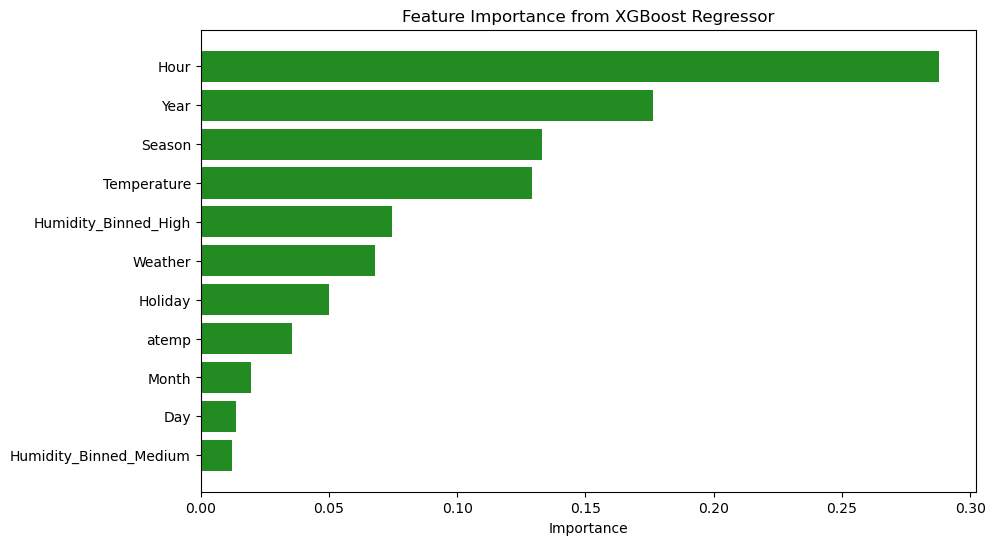

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color = "forestgreen")
plt.xlabel("Importance")
plt.title("Feature Importance from XGBoost Regressor")
plt.gca().invert_yaxis()  
plt.show()

Interpretasi : <br><br>
Fitur-fitur dengan pengaruh terbesar pada model XGBoost Regressor :
* Hour (0.28): Fitur hour memiliki kontribusi paling besar terhadap prediksi.
* Year (0.17): Tahun signifikan dalam mempengaruhi model.
* Season (0.13): Musim memilki pengaruh pola demand.

In [39]:
df_drop = df.drop(["Humidity", "casual", "registered", "Count"], axis = 1)
X_encoded = pd.get_dummies(df_drop, columns=["Humidity_Binned"], drop_first = True)

# Define and fit the model
model = RandomForestRegressor(random_state = 69)
model.fit(X_encoded, y)

# Get the feature importances from the model
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

Feature  Importance
8                     Hour    0.541219
7              Temperature    0.145742
0                     Year    0.077512
2                      Day    0.074717
6                    atemp    0.045878
1                    Month    0.033104
3                  Weather    0.029761
5                   Season    0.028880
10    Humidity_Binned_High    0.009948
9   Humidity_Binned_Medium    0.008263
4                  Holiday    0.004976

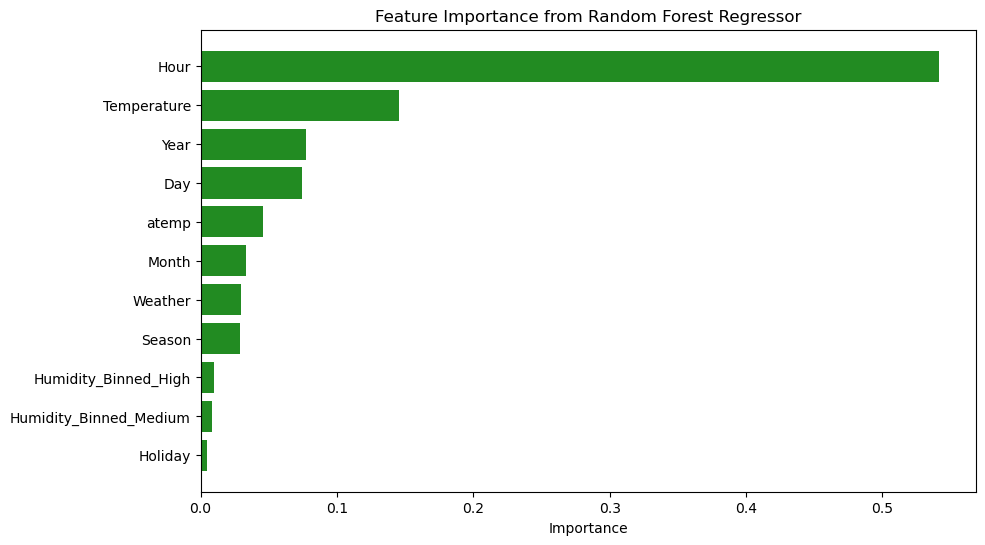

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color = "forestgreen")
plt.xlabel("Importance")
plt.title("Feature Importance from Random Forest Regressor")
plt.gca().invert_yaxis()  
plt.show()

Interpretasi : <br><br>
Fitur-fitur dengan pengaruh terbesar pada model XGBoost Regressor :
* Hour (0.54): Fitur Hour memiliki kontribusi paling besar terhadap prediksi. Hal tersebut dapat dikarenakan permintaan bike share sangat dipengaruhi oleh waktu dalam sehari.
* Temperature (0.15): Fitur Temperature cukup signifikan karena suhu memengaruhi kenyamanan pengguna dalam menggunakan sepeda.

**Assign New Feature**

*Menggunakan semua fitur baru berdasarkan hasil analisis Feature Importance, kecuali atemp karena memiliki VIF (Variance Inflation Factor) yang tinggi. <br>Alasan menggunakan semua fitur adalah karena masing-masing fitur memberikan kontribusi terhadap prediksi dan tidak menunjukkan indikasi multikolinearitas (kecuali atemp). <br>Sehingga, dengan mempertahankan semua fitur yang relevan, model dapat menangkap informasi yang lebih lengkap untuk meningkatkan akurasi prediksi.*

In [41]:
X = df.drop(["Humidity", "atemp", "casual", "registered", "Count"], axis = 1)
y = df["Count"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  
    test_size = 0.2,
    random_state = 69)

In [43]:
scaler = StandardScaler()

**Hyperparameter Tuning**

*Hyperparameter tuning dilakukan untuk meningkatkan performa model dengan memanfaatkan RandomizedSearchCV.*
<br><br>
Parameter yang dioptimalkan meliputi:
* XGBoost : max_depth, learning_rate, n_estimators, gamma, dan lainnya.
* Random Forest : n_estimators, max_depth, min_samples_split, min_samples_leaf, dan max_features.

In [44]:
max_depth = list(np.arange(1, 11))

# Learning rate: biasanya antara 0.01 hingga 0.3 untuk XGBoost
learning_rate = list(np.linspace(0.01, 0.3, 30))

# Jumlah pohon: biasanya antara 100 hingga 1000 tergantung data dan penggunaan
n_estimators = list(np.arange(100, 501, 50))

# Jumlah baris tiap pohon (% dari total baris training set)
subsample = list(np.linspace(0.5, 1.0, 6))  # Menggunakan rentang 0.5-1.0 agar sesuai dengan batas XGBoost

# Gamma (penurunan impurity minimum untuk menambah konservatisme model)
gamma = list(np.linspace(0, 5, 11))  # Mulai dari 0 hingga 5 untuk kontrol regularisasi

# Jumlah fitur yang digunakan untuk tiap pohon (% dari total kolom training set)
colsample_bytree = list(np.linspace(0.5, 1.0, 6))  # Biasanya di antara 0.5-1.0 untuk menghindari overfitting

# Alpha (L1 regularization) untuk mengurangi overfitting
reg_alpha = list(np.logspace(-3, 1, 10))  # L1 regularization parameter (dari 0.001 hingga 10)

# Beta (L2 regularization) untuk lebih mengurangi overfitting
reg_lambda = list(np.logspace(-3, 1, 10))  # L2 regularization parameter (dari 0.001 hingga 10)

# Hyperparameter space untuk XGBoost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda': reg_lambda
}

In [45]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=69, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=69)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 69  
)

In [46]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

# Melihat hasil parameter terbaik
print("Best Parameters: ", random_xgb.best_params_)
print("Best Score: ", -random_xgb.best_score_)

Best Parameters:  {'model__subsample': 0.9, 'model__reg_lambda': 0.021544346900318832, 'model__reg_alpha': 1.2915496650148828, 'model__n_estimators': 350, 'model__max_depth': 7, 'model__learning_rate': 0.019999999999999997, 'model__gamma': 2.5, 'model__colsample_bytree': 1.0}
Best Score:  83.18486668777155


*Random Forest Regressor*

In [47]:
param_dist = {
    'model__n_estimators': [50, 100, 200, 300, 500],
    'model__max_depth': [None, 10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': [None, 'sqrt', 'log2'], 
    'model__bootstrap': [True, False],
}

In [48]:
rf = RandomForestRegressor(random_state = 69)

estimator_rf = Pipeline([
    ('preprocessing', transformer), 
    ('scaler', scaler),              
    ('model', rf)                   
])

random_rf = RandomizedSearchCV(
    estimator=estimator_rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1  # Parallel processing dikurangi untuk debugging
)

In [49]:
estimator_rf.fit(X_train, y_train)
y_pred = estimator_rf.predict(X_test)
print("Pipeline berhasil!")

Pipeline berhasil!


In [50]:
random_rf.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor terbaik
print("Best Parameters: ", random_rf.best_params_)
print("Best Score: ", -random_rf.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END model__bootstrap=True, model__max_depth=20, model__max_features=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=   6.2s
[CV] END model__bootstrap=True, model__max_depth=20, model__max_features=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=   6.2s
[CV] END model__bootstrap=True, model__max_depth=20, model__max_features=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=   6.2s
[CV] END model__bootstrap=False, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.9s
[CV] END model__bootstrap=False, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.9s
[CV] END model__bootstrap=False, model__max_de

**Predict to Test Set with the Tuned Model**

In [51]:
models = {
    'XGB': XGBRegressor(random_state = 69),
    'RandomForest': RandomForestRegressor(random_state = 69)
}

xgb_tuning = random_xgb.best_estimator_
rf_tuning = random_rf.best_estimator_

# Fitting model pada training set
xgb_tuning.fit(X_train, y_train)
rf_tuning.fit(X_train, y_train)

# Predict pada test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrik evaluasi untuk RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r_squared_xgb_tuning = xgb_tuning.score(X_test, y_test)

rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
r_squared_rf_tuning = rf_tuning.score(X_test, y_test)

# Simpan skor dalam DataFrame untuk perbandingan
score_after_tuning = pd.DataFrame({
    'MAE': [mae_xgb_tuning, mae_rf_tuning],
    'RMSE': [rmse_xgb_tuning, rmse_rf_tuning],  
    'MAPE': [mape_xgb_tuning, mape_rf_tuning], 
    'R Squared': [r_squared_xgb_tuning, r_squared_rf_tuning]
}, index=['XGBoost', 'Random Forest'])

**Performance Comparison**

In [52]:
score_before_tuning

RMSE        MAE      MAPE        R²
XGBoost       82.591820  54.454450  0.869187  0.796274
RandomForest  83.293043  53.183058  0.769932  0.792799

In [53]:
score_after_tuning

MAE       RMSE      MAPE  R Squared
XGBoost        53.108943  81.021637  0.741666   0.803946
Random Forest  52.203476  82.322954  0.736413   0.797598

Interpretasi : <br>

Sebelum Tuning:
* Algoritma XGBoost memiliki performa RMSE sebesar 82.95 dan R² sebesar 0.79.
* Algoritma Random Forest memiliki RMSE sebesar 83.29 dengan R² sebesar 0.73.
<br>

Secara umum, XGBoost memiliki performa yang lebih baik dibandingkan Random Forest.
<br><br>
Setelah Tuning:

Performa model meningkat setelah tuning:
* XGBoost menunjukkan RMSE turun menjadi 53.10 dengan R² sebesar 0.89.
* Random Forest menunjukkan RMSE turun menjadi 52.20 dengan R² sebesar 0.89.
<br>

Kedua algoritma kini memiliki kinerja yang hampir sama, tetapi XGBoost sedikit lebih baik dalam metrik R Squared.

In [57]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Mendapatkan nama kolom hasil encoding dari OneHotEncoder dan BinaryEncoder
onehot_columns = transformer.transformers_[0][1].get_feature_names_out(["Humidity_Binned"])

# Gabungkan dengan nama kolom fitur numerik yang tidak terpengaruh oleh encoding
numerical_columns = [col for col in X.columns if col not in ["Humidity_Binned"]]

# Gabungkan semua nama kolom
columns = list(onehot_columns) + numerical_columns

# Buat DataFrame dari hasil transformasi
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=columns)

# Fungsi untuk menghitung VIF
# def calc_vif(X):
#     # Menambahkan konstanta untuk menghitung VIF
#     X_const = add_constant(X)
#     vif = pd.DataFrame()
#     vif["variables"] = X_const.columns
#     vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
#     return vif

# # Menghitung VIF pada X_train yang sudah ditransformasi
# vif_result = calc_vif(X_train_transformed_df)

# vif_result

In [58]:
import shap
# Model dengan parameter terbaik
xgb_model = XGBRegressor(
    subsample=0.7,
    reg_alpha=1.2915496650148828,
    n_estimators=379,
    max_depth=6,
    learning_rate=0.11,
    gamma=10,
    colsample_bytree=0.5,
    random_state=42
)
xgb_model.fit(X_train_transformed, y_train)

# Membuat objek SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_transformed_df)

# Menghitung nilai SHAP
shap_values = explainer(X_train_transformed_df)

 99%|===================| 9683/9732 [02:46<00:00]        

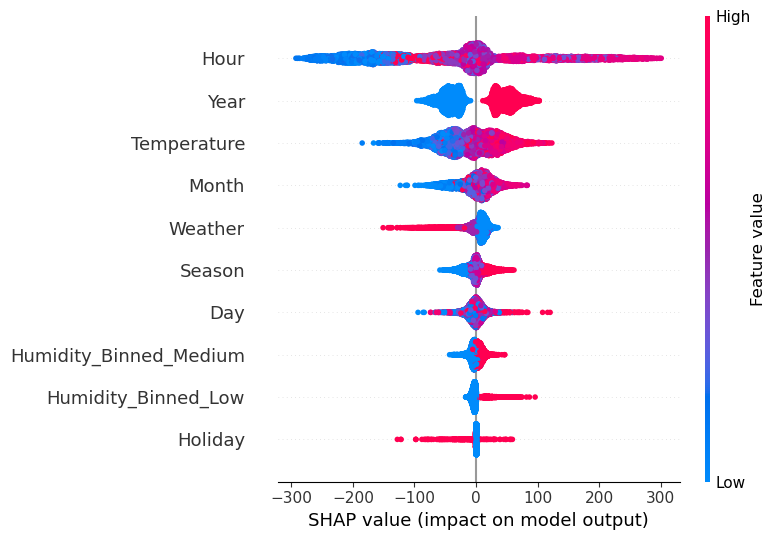

In [59]:
shap.summary_plot(shap_values, X_train_transformed)

Interpretasi :
* Hour adalah fitur paling berpengaruh, menunjukkan waktu dalam sehari sangat menentukan jumlah peminjaman sepeda.
* Year dan Temperature juga signifikan, mencerminkan pola musiman dan dampak cuaca.

Dampak Fitur:
* Hour: Jam tinggi (merah) meningkatkan prediksi.
* Temperature: Suhu tinggi (merah) meningkatkan peminjaman, suhu rendah (biru) menurunkan.

Model yang dipilih adalah model XGBoost karena:
* Performa R² yang tinggi, menunjukkan kemampuannya dalam menangkap pola data secara menyeluruh.
* Keunggulan dalam efisiensi, fleksibilitas, dan kontrol terhadap overfitting.
* Kemampuan untuk menangani data yang lebih kompleks atau memiliki tantangan seperti missing values atau non-linear relationships.

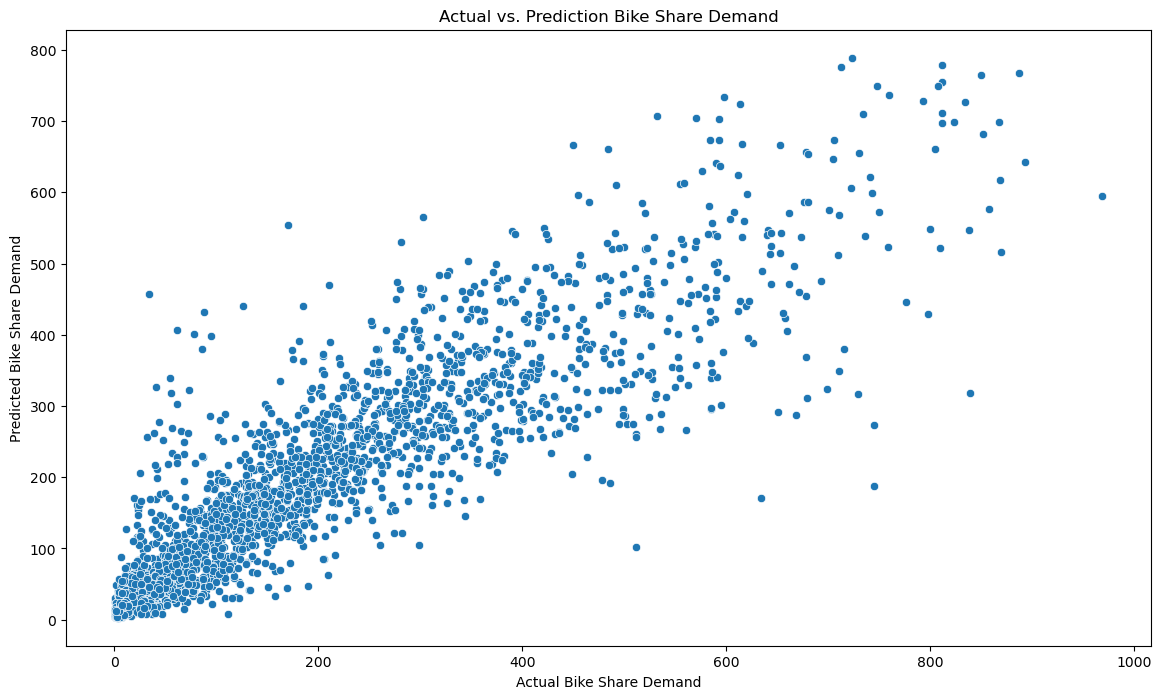

In [51]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x = y_test, y = y_pred_rf_tuning).set(title = "Actual vs. Prediction Bike Share Demand", 
                                               xlabel = "Actual Bike Share Demand", 
                                               ylabel = "Predicted Bike Share Demand");

Interpretasi :
* Visualisasi scatter plot menunjukkan hubungan antara nilai aktual dan prediksi.
* Mayoritas titik data terdistribusi di sekitar garis diagonal (y = x), menunjukkan bahwa model memiliki kemampuan prediksi yang baik.
* Namun, ada beberapa outlier yang menunjukkan prediksi yang tidak akurat pada kondisi tertentu.

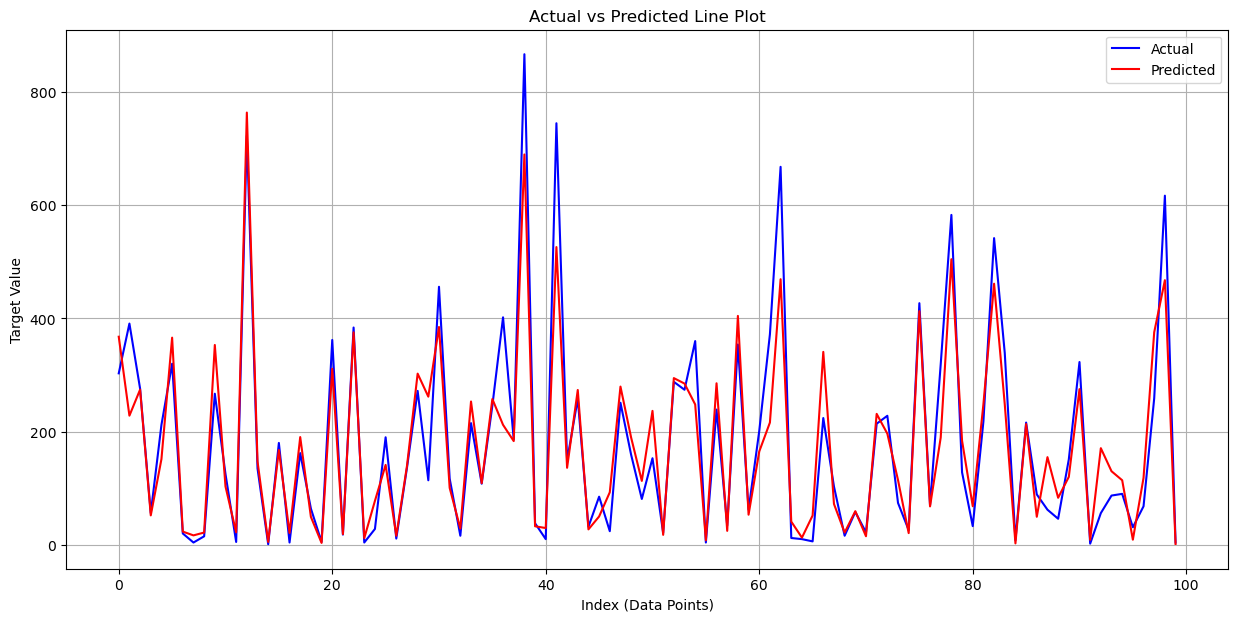

In [66]:
sample_size = 100  # Take the first 100 data points for better visualization
y_test_sample = y_test[:sample_size]
y_pred_sample = y_pred_xgb_tuning[:sample_size]

# Create a dataframe for sns lineplot
plot_data = pd.DataFrame({
    'Index': range(len(y_test_sample)),
    'Actual': y_test_sample,
    'Predicted': y_pred_sample
})

# Using sns.lineplot for visualizationß
plt.figure(figsize=(15, 7))
sns.lineplot(data=plot_data, x='Index', y='Actual', label='Actual', color='blue')
sns.lineplot(data=plot_data, x='Index', y='Predicted', label='Predicted', color='red')

# Add title and axis labels
plt.xlabel('Index (Data Points)')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Line Plot')
plt.legend()
plt.grid(True)
plt.show()

Interpretasi :
* Visualisasi ini memperlihatkan pola data aktual dan prediksi untuk 100 data pertama.
* Garis biru (aktual) dan merah (prediksi) cenderung mengikuti pola yang sama, menunjukkan model dapat memprediksi tren dengan baik.
* Beberapa perbedaan terjadi pada nilai-nilai ekstrem (puncak dan lembah).

#### **Residual Analysis**

In [53]:
dataframe = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred_xgb_tuning
})

dataframe['Residual'] = dataframe['Actual'] - dataframe['Predicted']
dataframe.sort_index()

Actual   Predicted    Residual
1          18   13.101209    4.898791
16         16    9.035879    6.964121
22        838  561.243103  276.756897
30        183  162.735886   20.264114
39          1    5.056776   -4.056776
...       ...         ...         ...
12150     268  227.477600   40.522400
12154     331  360.219360  -29.219360
12156     292  259.902191   32.097809
12160     257  132.993698  124.006302
12162       6    8.105216   -2.105216

[2433 rows x 3 columns]

In [54]:
result = df.join(dataframe, how='outer')  # Menggabungkan DataFrame
filtered_result = result[result['Actual'].notna()]  # Memfilter baris dengan nilai 'Actual' yang bukan NaN
filtered_result

Year  Month  Day  Humidity  Weather  Holiday  Season   atemp  \
1      2012      6   17      0.64        1        0       2  0.5152   
16     2012      2   27      0.80        1        0       1  0.2273   
22     2012      9   26      0.73        1        0       4  0.5303   
30     2012      6   16      0.53        1        0       2  0.6212   
39     2011      3   31      0.93        3        0       2  0.2273   
...     ...    ...  ...       ...      ...      ...     ...     ...   
12150  2012     12   12      0.52        1        0       4  0.2879   
12154  2012      9    7      0.55        1        0       3  0.7576   
12156  2012     10   26      0.77        2        0       4  0.5152   
12160  2012      1   25      0.75        1        0       1  0.2273   
12162  2012      2   20      0.60        2        1       1  0.2121   

       Temperature  Hour  casual  registered  Count Humidity_Binned  Actual  \
1             0.54     4       2          16     18          Medium    18.0   
16            0.22     5       0          16     16            High    16.0   
22            0.56     8      30         808    838            High   838.0   
30            0.60    23      49         134    183          Medium   183.0   
39            0.24     3       0           1      1            High     1.0   
...            ...   ...     ...         ...    ...             ...     ...   
12150         0.30    20      25         243    268          Medium   268.0   
12154         0.80    15      66         265    331          Medium   331.0   
12156         0.54    21      40         252    292            High   292.0   
12160         0.24     7      14         243    257            High   257.0   
12162         0.24     5       0           6      6          Medium     6.0   

        Predicted    Residual  
1       13.101209    4.898791  
16       9.035879    6.964121  
22     561.243103  276.756897  
30     162.735886   20.264114  
39       5.056776   -4.056776  
...           ...         ...  
12150  227.477600   40.522400  
12154  360.219360  -29.219360  
12156  259.902191   32.097809  
12160  132.993698  124.006302  
12162    8.105216   -2.105216  

[2433 rows x 17 columns]

In [55]:
residuals = y_test - y_pred_xgb_tuning

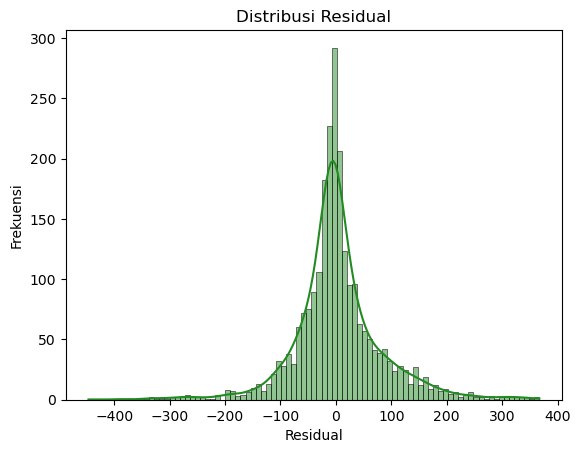

In [56]:
sns.histplot(residuals, kde = True, color = "forestgreen")
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.show()

Interpretasi :
* Residual dihitung sebagai selisih antara nilai aktual dan prediksi.
* Distribusi residual berbentuk mendekati normal tetapi sedikit skewed.

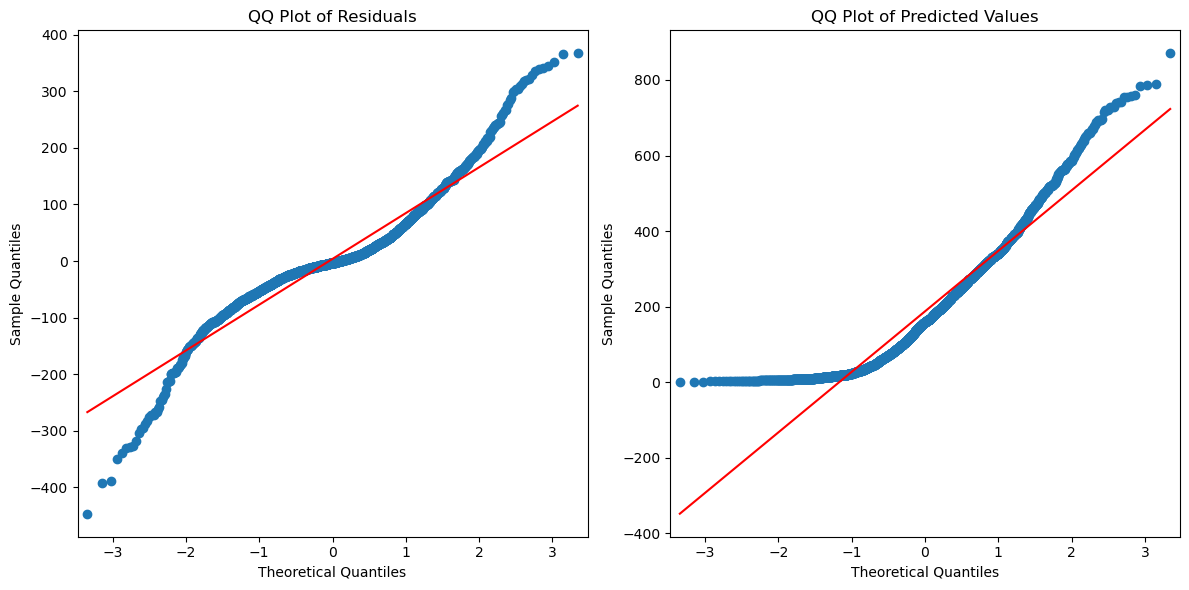

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# QQ Plot Residual
sm.qqplot(residuals, line='s', ax=axes[0])
axes[0].set_title('QQ Plot of Residuals')

# QQ Plot Predicted
sm.qqplot(y_pred, line='s', ax=axes[1])
axes[1].set_title('QQ Plot of Predicted Values')

plt.tight_layout()
plt.show()

Interpretasi :
* QQ Plot residual dari model XGBoost menunjukkan beberapa outlier signifikan, terutama di kedua ujung distribusi (nilai residual ekstrem).
* QQ Plot untuk nilai prediksi dari model XGBoost menunjukkan kesesuaian dengan distribusi normal pada sebagian besar data, tetapi outlier tetap ada.

In [58]:
shapiro(filtered_result['Residual'])

sw_statistic, sw_pvalue = shapiro(filtered_result['Residual'])

if sw_pvalue > 0.05:
    print(f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else:
    print(f'P-Value: {sw_pvalue}. So, we do not assume a normal distribution')

P-Value: 3.841300337683136e-34. So, we do not assume a normal distribution


Interpretasi :
* Hasil tes normalitas (Shapiro-Wilk) menunjukkan p-value sangat kecil (3.84e-34), sehingga residual dari model XGBoost tidak diasumsikan berdistribusi normal.

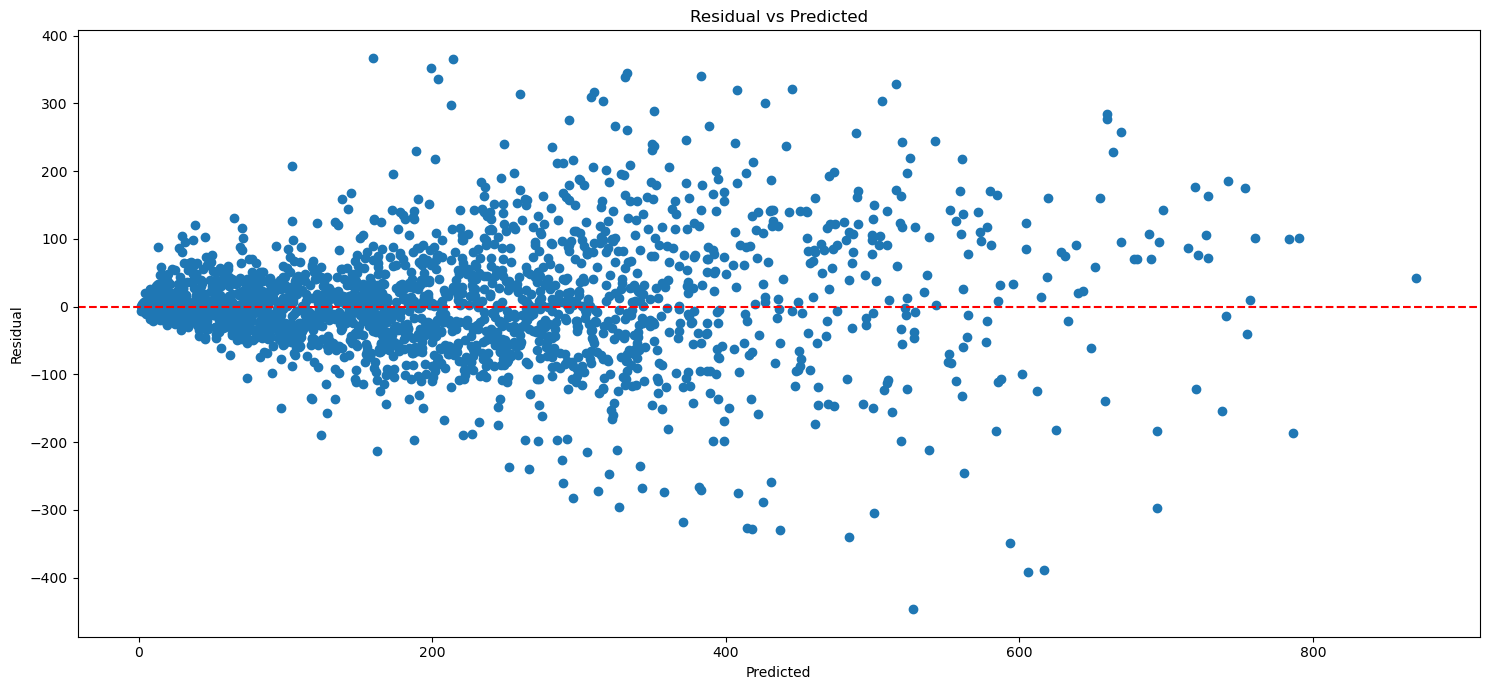

In [59]:
plt.figure(figsize = (15,7))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

Interpretasi :
* Scatter plot residual vs hasil prediksi dari model XGBoost menunjukkan pola acak di sekitar garis nol, yang mengindikasikan tidak adanya pola sistematis dalam kesalahan prediksi.

In [60]:
extreme_values = filtered_result[(filtered_result['Residual'] > 200) | (filtered_result['Residual'] < -200)].sort_values(by='Residual', ascending=False)
extreme_values

Year  Month  Day  Humidity  Weather  Holiday  Season   atemp  \
751    2012      9    8      0.88        3        0       3  0.5303   
9883   2012      3   17      0.77        2        0       1  0.5000   
9885   2012      1    7      0.42        1        0       1  0.4848   
193    2012     10   27      0.60        2        0       4  0.5303   
5590   2012      6    2      0.41        1        0       2  0.6212   
...     ...    ...  ...       ...      ...      ...     ...     ...   
4919   2012      8   26      0.89        1        0       3  0.5758   
8206   2012      9    9      0.68        1        0       3  0.5455   
11115  2012     10   13      0.53        1        0       4  0.3485   
11101  2012      7    8      0.62        1        0       3  0.7424   
263    2012     12   16      0.87        2        0       4  0.3485   

       Temperature  Hour  casual  registered  Count Humidity_Binned  Actual  \
751           0.56    15     175         337    512            High   512.0   
9883          0.52    11     226         359    585            High   585.0   
9885          0.50    14     156         356    512          Medium   512.0   
193           0.56    15     310         401    711          Medium   711.0   
5590          0.62    13     279         400    679          Medium   679.0   
...            ...   ...     ...         ...    ...             ...     ...   
4919          0.64     7      11          23     34            High    34.0   
8206          0.58     8      27         143    170          Medium   170.0   
11115         0.34     8      23         151    174          Medium   174.0   
11101         0.78    18      54         199    253          Medium   253.0   
263           0.36     8      12          76     88            High    88.0   

        Predicted    Residual  
751    145.040817  366.959183  
9883   219.454956  365.545044  
9885   159.637863  352.362137  
193    366.926819  344.073181  
5590   338.613068  340.386932  
...           ...         ...  
4919   373.308563 -339.308563  
8206   518.984497 -348.984497  
11115  563.161560 -389.161560  
11101  644.899658 -391.899658  
263    534.420776 -446.420776  

[83 rows x 17 columns]

In [61]:
high_humidity_extreme_val = extreme_values[extreme_values["Humidity_Binned"] == "High"]
high_humidity_val = filtered_result[filtered_result["Humidity_Binned"] == "High"]

In [62]:
display(high_humidity_extreme_val, high_humidity_val)

Year  Month  Day  Humidity  Weather  Holiday  Season   atemp  \
751    2012      9    8      0.88        3        0       3  0.5303   
9883   2012      3   17      0.77        2        0       1  0.5000   
11857  2012      4   16      0.83        2        1       2  0.5303   
7345   2012      8   26      0.74        3        0       3  0.6970   
912    2012     10    2      0.88        3        0       4  0.5606   
22     2012      9   26      0.73        1        0       4  0.5303   
901    2012     10   10      0.77        1        0       4  0.4848   
5024   2012      7   26      0.74        2        0       3  0.6667   
1685   2012      8   27      0.83        1        0       3  0.6061   
4646   2012     12    8      0.82        1        0       4  0.4242   
7191   2012     10   12      0.71        1        0       4  0.4242   
11350  2011     11   30      0.81        1        0       4  0.2727   
8883   2011      5   15      0.73        1        0       2  0.5909   
7422   2012      3   21      0.94        3        0       2  0.4697   
9113   2011     10    9      0.86        1        0       4  0.4394   
999    2012      1   21      0.93        2        0       1  0.1515   
9605   2011     11   27      0.82        1        0       4  0.4091   
7374   2011      8   14      0.89        2        0       3  0.5909   
4369   2012      6   23      0.83        1        0       3  0.5758   
189    2012      8   11      0.83        1        0       3  0.5758   
4552   2012     10   27      0.83        1        0       4  0.4697   
2378   2012      7   14      0.78        1        0       3  0.5909   
5607   2012      6   10      0.78        1        0       2  0.5758   
4061   2012      9   18      0.88        2        0       3  0.5455   
11796  2012      8    5      0.84        1        0       3  0.6667   
8998   2012     11   23      0.87        1        0       4  0.2576   
4919   2012      8   26      0.89        1        0       3  0.5758   
263    2012     12   16      0.87        2        0       4  0.3485   

       Temperature  Hour  casual  registered  Count Humidity_Binned  Actual  \
751           0.56    15     175         337    512            High   512.0   
9883          0.52    11     226         359    585            High   585.0   
11857         0.56     8      48         549    597            High   597.0   
7345          0.72    12     225         401    626            High   626.0   
912           0.62    17      38         677    715            High   715.0   
22            0.56     8      30         808    838            High   838.0   
901           0.50     8      33         806    839            High   839.0   
5024          0.70     8      49         680    729            High   729.0   
1685          0.66     8      29         670    699            High   699.0   
4646          0.42    15     167         374    541            High   541.0   
7191          0.42     8      34         711    745            High   745.0   
11350         0.28     8      13         465    478            High   478.0   
8883          0.62    13     195         261    456            High   456.0   
7422          0.48     8      33         502    535            High   535.0   
9113          0.44     7      18          26     44            High    44.0   
999           0.16     8       3          22     25            High    25.0   
9605          0.40     8       6          36     42            High    42.0   
7374          0.66     8      20          21     41            High    41.0   
4369          0.64     7      19          59     78            High    78.0   
189           0.64     7       8          54     62            High    62.0   
4552          0.48     7       7          79     86            High    86.0   
2378          0.64     7       7          41     48            High    48.0   
5607          0.60     7      21          41     62            High    62.0   
4061          0.60    18      19         262    281

Year  Month  Day  Humidity  Weather  Holiday  Season   atemp  \
16     2012      2   27      0.80        1        0       1  0.2273   
22     2012      9   26      0.73        1        0       4  0.5303   
39     2011      3   31      0.93        3        0       2  0.2273   
40     2012      3   22      1.00        2        0       2  0.4697   
45     2011     10    9      0.88        1        0       4  0.4545   
...     ...    ...  ...       ...      ...      ...     ...     ...   
12101  2011      5    8      0.72        1        0       2  0.4545   
12109  2011     10   24      0.82        3        0       4  0.4697   
12147  2011      9   14      0.83        1        0       3  0.5606   
12156  2012     10   26      0.77        2        0       4  0.5152   
12160  2012      1   25      0.75        1        0       1  0.2273   

       Temperature  Hour  casual  registered  Count Humidity_Binned  Actual  \
16            0.22     5       0          16     16            High    16.0   
22            0.56     8      30         808    838            High   838.0   
39            0.24     3       0           1      1            High     1.0   
40            0.48     5       2          32     34            High    34.0   
45            0.46     0      46          83    129            High   129.0   
...            ...   ...     ...         ...    ...             ...     ...   
12101         0.46     3      10          21     31            High    31.0   
12109         0.48    19      25         212    237            High   237.0   
12147         0.60     2       1           4      5            High     5.0   
12156         0.54    21      40         252    292            High   292.0   
12160         0.24     7      14         243    257            High   257.0   

        Predicted    Residual  
16       9.035879    6.964121  
22     561.243103  276.756897  
39       5.056776   -4.056776  
40      24.625586    9.374414  
45      58.450470   70.549530  
...           ...         ...  
12101   15.921663   15.078337  
12109  123.192612  113.807388  
12147   22.154890  -17.154890  
12156  259.902191   32.097809  
12160  132.993698  124.006302  

[891 rows x 17 columns]

#### **Summary**

Setelah dilakukan tuning, performa model XGBoost dan Random Forest meningkat signifikan, dengan nilai RMSE dan R² masing-masing menjadi sekitar 53 dan 0.89. Meski kedua algoritma menunjukkan performa serupa, XGBoost dipilih karena kemampuannya yang konsisten dalam menangani dataset besar dan kompleks.
<br><br>
Visualisasi menunjukkan model memiliki pola prediksi yang cukup baik, tetapi masih ada beberapa data dengan error tinggi. Analisis residual mengindikasikan bahwa error tidak terdistribusi normal, sehingga diperlukan evaluasi lebih lanjut terhadap hubungan antara error dan fitur yang digunakan.
<br><br>
Rekomendasi utama meliputi analisis lebih lanjut pada error tinggi, penambahan fitur relevan seperti pola lalu lintas atau lokasi, pembaruan data secara berkala, dan integrasi model ke dalam sistem operasional bike-sharing untuk mendukung keputusan alokasi sumber daya. Model ini juga dapat dikembangkan untuk prediksi tambahan seperti tingkat penggunaan musiman atau dampak promosi pada permintaan.

#### **Rekomendasi**

1. **Tambahkan Fitur dengan Korelasi Lebih Tinggi terhadap Target (jumlah penyewaan)**
<br><br>
Memasukkan fitur tambahan yang memiliki hubungan lebih erat dengan target, seperti lokasi stasiun sepeda, jarak stasiun dengan kantor/sekolah/ruang publik, serta jenis sepeda yang tersedia, dapat membantu model menangkap pola data secara lebih baik. Fitur-fitur ini berpotensi meningkatkan akurasi prediksi karena memberikan informasi yang relevan dengan perilaku pengguna.

2. **Perluas Dataset**
<br><br>
Dataset saat ini hanya mencakup satu tahun (2011–2012), sehingga cakupannya terbatas. Dengan memperluas dataset untuk mencakup data dari beberapa tahun, model akan memiliki lebih banyak variasi dan informasi historis yang dapat digunakan untuk memahami tren jangka panjang. Data yang lebih kaya ini dapat meningkatkan kemampuan model dalam melakukan prediksi yang lebih akurat.

3. **Manfaatkan Model untuk Memberikan Wawasan Strategis**
<br><br>
Gunakan model untuk memprediksi jumlah total penyewaan sepeda di lokasi-lokasi tertentu. Prediksi ini dapat dianalisis untuk menghasilkan wawasan strategis, seperti menentukan lokasi optimal untuk penempatan stasiun sepeda baru di area dengan permintaan tinggi atau lokasi strategis lainnya. Dengan demikian, model tidak hanya meningkatkan akurasi, tetapi juga membantu pengambilan keputusan operasional yang lebih efektif dan efisien.

---

#### **Save Model**

In [60]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_BikeSharing_XGB.sav', 'wb'))

In [61]:
# Load model
filename = 'Model_BikeSharing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [65]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))